# DSC 80: Project 02

### Checkpoint Due Date: Thursday, January 30 11:59:59 PM (Q1-5)

### Final Due Date: Thursday, February 6 11:59:59 PM

---
# Instructions

This Jupyter Notebook contains the statements of the problems and provides code and markdown cells to display your answers to the problems.  
* Like the lab, your coding work will be developed in the accompanying `projectXX.py` file, that will be imported into the current notebook. This code will be autograded.

**Do not change the function names in the `*.py` file**
- The functions in the `*.py` file are how your assignment is graded, and they are graded by their name. The dictionary at the end of the file (`GRADED FUNCTIONS`) contains the "grading list". The final function in the file allows your doctests to check that all the necessary functions exist.
- If you changed something you weren't supposed to, just use git to revert!

**Tips for developing in the .py file**:
- Do not change the function names in the starter code; grading is done using these function names.
- Do not change the docstrings in the functions. These are there to tell you if your work is on the right track!
- You are encouraged to write your own additional functions to solve the HW! 
    - Developing in python usually consists of larger files, with many short functions.
    - You may write your other functions in an additional `.py` file that you import in `projectXX.py` (much like we do in the notebook).
- Always document your code!

## Checkpoint Instructions

* The checkpoint requires you to turn in **questions 1-5**; 
* The checkpoint will be graded for *approximate* correctness: easier than the final tests; harder than the doctests.


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import project02 as proj

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import os

# An Investigation into Flight Delays

### The flights dataset

The department of transportation has all flight delays for listed years on their [website](https://catalog.data.gov/dataset/airline-on-time-performance-and-causes-of-flight-delays-on-time-data). There are data for the years 1987 - 2018. See the description of columns in `data/columns.txt`.

This project will look at a single year (2015) to keep the analysis "simple", which is available at the URL below (*NOT* on the data.gov site).


* To download the flights dataset to your computer, use [this link](https://dsc80-fa19-data.s3-us-west-2.amazonaws.com/project02/flight-delays.zip), unzip the file, and place `flights.csv` in your project directory.

* To download the dataset on `datahub.ucsd.edu` (this works on your computer as well!):
    - Open the terminal in datahub ("new > Terminal")
    - Change the directory to where you want your data (e.g. `cd [ASSIGNMENT_PATH]/data`)
    - Download the unzipped dataset using these commands:
        1. `wget https://dsc80-fa19-data.s3-us-west-2.amazonaws.com/project02/flight-delays.zip`
        2. `unzip flight-delays.zip`
    - `flights.csv` should be in the directory.
    
**NOTE: The unzipped files must be in the `project02/data` directory in order for the doctests to work!**

### Creating your datasets

**Question 1**

The flights dataset for 2015 is not small (~600MB). While you could likely load the entire dataset into Pandas on your laptop, if you wanted to work with more than one year, this would quickly become difficult (the data is available for 1987-2018). Therefore, we will filter down the dataset into two smaller files without ever reading the larger dataset fully into memory. We are going to create two smaller datasets:

1. All flights arriving or departing from San Diego International Airport in 2015.
2. All flights flown by either JetBlue or Southwest Airline in 2015.

---

To do this, you are going to use the `chunksize=N` keyword in Pandas `read_csv` to read the flights dataset in blocks of `N` lines. When you use this keyword argument, `pd.read_csv(fp, chunksize=N)` becomes a *iterator* that iterates through dataframes of length N until you have reached the end of the dataset. A typical pattern looks like:
```
L = pd.read_csv(filepath, chunksize=1000)
for df in L:
    process(df)
```
Where each `df` is a dataframe of length 1000. 

The processing you are going to do is:
1. Iterate through the dataset, chunk-by-chunk,
2. Filtering out rows of each chunk
3. Incrementally add to a filtered csv file (since the data is perhaps too big to keep in memory). Keep in mind, if you want to keep writing to the same file, the mode='a' keyword in the `.to_csv` method can be helpful when calling it in the loop (a stands for 'append')

---

Write two functions that create the datasets below, using the 'chunking' pattern described above. Your functions should use `chunksize` of 10000.
1. `get_san` which takes in a filepath containing all flights and an filepath where filtered dataset #1 is written. The function should return `None`.
1. `get_jb_sw` which takes in a filepath containing all flights and an filepath where filtered dataset #2 is written. The function should return `None`.

*Remark 1*: **Gradescope autograding servers are quite small and can't load this dataset into memory** -- so your code that reads in the large `flights.csv` dataset *must* work with chunks of the dataset one at a time to pass!

*Remark 2:* You can check your work using the datasets included in the zip file!

Remember to close your file properly!

In [4]:
infp = os.path.join('data', 'flights.test')
outfp = os.path.join('data', 'santest.tmp')

In [5]:
# jet blue B6 | south west WN
flights = pd.read_csv(infp)
flights

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,3,5,4,AA,48,N3CMAA,SAN,DFW,823,...,1341,26.0,False,False,NaN,26.0,0.0,0.0,0.0,0.0
1,2015,11,4,3,AA,741,N916US,PHL,SAN,1800,...,2058,7.0,False,False,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,7,17,5,UA,1641,N33264,SAN,EWR,615,...,1410,-28.0,False,False,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,12,2,3,UA,546,N17244,SAN,IAD,800,...,1528,-22.0,False,False,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,2,11,3,WN,4175,N714CB,OAK,SAN,1340,...,1537,32.0,False,False,NaN,3.0,0.0,3.0,26.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2015,9,23,3,WN,2271,N8612K,MDW,BWI,1345,...,1640,5.0,False,False,NaN,NaN,NaN,NaN,NaN,NaN
96,2015,9,29,2,B6,2379,N267JB,BOS,EWR,910,...,1028,-2.0,False,False,NaN,NaN,NaN,NaN,NaN,NaN
97,2015,9,14,1,WN,277,N210WN,ATL,STL,2035,...,2114,-1.0,False,False,NaN,NaN,NaN,NaN,NaN,NaN
98,2015,5,24,7,WN,51,N523SW,DAL,HOU,1900,...,2030,20.0,False,False,NaN,0.0,0.0,12.0,8.0,0.0


In [6]:
# get_san function
flights[(flights['ORIGIN_AIRPORT'] == 'SAN') | (flights['DESTINATION_AIRPORT'] == 'SAN')].head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,3,5,4,AA,48,N3CMAA,SAN,DFW,823,...,1341,26.0,False,False,NaN,26.0,0.0,0.0,0.0,0.0
1,2015,11,4,3,AA,741,N916US,PHL,SAN,1800,...,2058,7.0,False,False,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,7,17,5,UA,1641,N33264,SAN,EWR,615,...,1410,-28.0,False,False,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,12,2,3,UA,546,N17244,SAN,IAD,800,...,1528,-22.0,False,False,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,2,11,3,WN,4175,N714CB,OAK,SAN,1340,...,1537,32.0,False,False,NaN,3.0,0.0,3.0,26.0,0.0


In [7]:
# get_jb_sw
flights[(flights['AIRLINE'] == 'B6') | (flights['AIRLINE'] == 'WN')]

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
4,2015,2,11,3,WN,4175,N714CB,OAK,SAN,1340,...,1537,32.0,False,False,NaN,3.0,0.0,3.0,26.0,0.0
5,2015,7,17,5,WN,900,N560WN,PHX,SAN,1345,...,1447,2.0,False,False,NaN,NaN,NaN,NaN,NaN,NaN
6,2015,2,20,5,WN,3745,N428WN,SAN,PHX,730,...,925,-20.0,False,False,NaN,NaN,NaN,NaN,NaN,NaN
10,2015,9,5,6,WN,1263,N960WN,SAT,SAN,1125,...,1158,-22.0,False,False,NaN,NaN,NaN,NaN,NaN,NaN
11,2015,8,21,5,B6,19,N584JB,BOS,SAN,1629,...,2000,27.0,False,False,NaN,0.0,0.0,27.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2015,9,23,3,WN,2271,N8612K,MDW,BWI,1345,...,1640,5.0,False,False,NaN,NaN,NaN,NaN,NaN,NaN
96,2015,9,29,2,B6,2379,N267JB,BOS,EWR,910,...,1028,-2.0,False,False,NaN,NaN,NaN,NaN,NaN,NaN
97,2015,9,14,1,WN,277,N210WN,ATL,STL,2035,...,2114,-1.0,False,False,NaN,NaN,NaN,NaN,NaN,NaN
98,2015,5,24,7,WN,51,N523SW,DAL,HOU,1900,...,2030,20.0,False,False,NaN,0.0,0.0,12.0,8.0,0.0


In [8]:
# get_san
infp = os.path.join('data', 'flights.csv')
outfp = os.path.join('data', 'sd_flights.tmp')

In [9]:
proj.get_san(infp, outfp)

/Users/erlin/anaconda3/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [10]:
pd.set_option('display.max_row', 100)

In [11]:
df = pd.read_csv(outfp)
df

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,DL,978,N693DL,SAN,SLC,615,...,906.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,OO,5608,N930SW,SAN,LAX,615,...,702.0,-5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,WN,823,N7707C,SAN,BWI,620,...,1352.0,-23.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,WN,603,N461WN,SAN,MDW,620,...,1201.0,-29.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,UA,1192,N69804,SAN,DEN,620,...,936.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140409,2015,12,31,4,DL,1792,N1402A,SAN,ATL,2230,...,511.0,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
140410,2015,12,31,4,UA,240,N30401,SAN,ORD,2235,...,405.0,-38.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
140411,2015,12,31,4,DL,1366,N341NW,SAN,DTW,2245,...,530.0,-34.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
140412,2015,12,31,4,UA,498,N37267,SFO,SAN,2252,...,6.0,-15.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
os.remove(outfp)

In [13]:
# get_jb_sw
infp = os.path.join('data', 'flights.csv')
outfp = os.path.join('data', 'jbswtest.tmp')

In [14]:
proj.get_sw_jb(infp, outfp)

In [15]:
# proj.get_sw_jb(infp, outfp)
f = pd.read_csv(outfp)
f

/Users/erlin/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,B6,304,N607JB,SJU,JFK,155,...,501.0,11.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,B6,1990,N597JB,SJU,EWR,206,...,516.0,4.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,B6,668,N653JB,PSE,MCO,255,...,451.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,B6,1030,N239JB,BQN,MCO,307,...,520.0,20.0,0,0,NaN,20.0,0.0,0.0,0.0,0.0
4,2015,1,1,4,B6,262,N627JB,SJU,BOS,330,...,619.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1528898,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,...,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1528899,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,...,430.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1528900,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,...,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1528901,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,...,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
os.remove(outfp)

# Flight Delays to/from San Diego

The department of transportation has all flight delays for listed years on their [website](https://catalog.data.gov/dataset/airline-on-time-performance-and-causes-of-flight-delays-on-time-data). 

The zip file at the [URL](https://dsc80-fa19-data.s3-us-west-2.amazonaws.com/project02/flight-delays.zip) contains a file `to_from_san.csv` that consists of all flights either to or from SAN (San Diego) in 2015 -- i.e. the output of Question 1. This dataset should match the dataset that your code returned in question 1.

Read in `to_from_san.csv` using `read_csv` and inspect the dataframe for an initial assessment about the data quality.

In [17]:
# Run this cell
to_from_san_filepath = os.path.join('data', 'to_from_san.csv')
flights = pd.read_csv(to_from_san_filepath)

In [18]:
pd.set_option('display.max_column', None)

In [19]:
flights

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,DL,978,N693DL,SAN,SLC,615,611.0,-4.0,20.0,631.0,121,115.0,89.0,626,900.0,6.0,916,906.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,OO,5608,N930SW,SAN,LAX,615,614.0,-1.0,16.0,630.0,52,48.0,25.0,109,655.0,7.0,707,702.0,-5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,WN,823,N7707C,SAN,BWI,620,620.0,0.0,18.0,638.0,295,272.0,248.0,2295,1346.0,6.0,1415,1352.0,-23.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,WN,603,N461WN,SAN,MDW,620,617.0,-3.0,17.0,634.0,250,224.0,200.0,1728,1154.0,7.0,1230,1201.0,-29.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,UA,1192,N69804,SAN,DEN,620,618.0,-2.0,18.0,636.0,145,138.0,110.0,853,926.0,10.0,945,936.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140409,2015,12,31,4,DL,1792,N1402A,SAN,ATL,2230,2223.0,-7.0,17.0,2240.0,234,228.0,199.0,1892,459.0,12.0,524,511.0,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
140410,2015,12,31,4,UA,240,N30401,SAN,ORD,2235,2240.0,5.0,11.0,2251.0,248,205.0,188.0,1723,359.0,6.0,443,405.0,-38.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
140411,2015,12,31,4,DL,1366,N341NW,SAN,DTW,2245,2231.0,-14.0,15.0,2246.0,259,239.0,211.0,1956,517.0,13.0,604,530.0,-34.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
140412,2015,12,31,4,UA,498,N37267,SFO,SAN,2252,2250.0,-2.0,11.0,2301.0,89,76.0,62.0,447,3.0,3.0,21,6.0,-15.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140414 entries, 0 to 140413
Data columns (total 31 columns):
YEAR                   140414 non-null int64
MONTH                  140414 non-null int64
DAY                    140414 non-null int64
DAY_OF_WEEK            140414 non-null int64
AIRLINE                140414 non-null object
FLIGHT_NUMBER          140414 non-null int64
TAIL_NUMBER            140205 non-null object
ORIGIN_AIRPORT         140414 non-null object
DESTINATION_AIRPORT    140414 non-null object
SCHEDULED_DEPARTURE    140414 non-null int64
DEPARTURE_TIME         139010 non-null float64
DEPARTURE_DELAY        139010 non-null float64
TAXI_OUT               138959 non-null float64
WHEELS_OFF             138959 non-null float64
SCHEDULED_TIME         140414 non-null int64
ELAPSED_TIME           138564 non-null float64
AIR_TIME               138564 non-null float64
DISTANCE               140414 non-null int64
WHEELS_ON              138864 non-null float64
TAXI_IN         

### Understanding the data types of the columns

**Question 2**:

* First, classify the *kind* of data each column in `flights` contains. Create a function `data_kinds` of zero variables which outputs a (hard-coded) dictionary of data kinds, keyed by column name, with values `Q`, `O`, `N` (for 'Quantitative', 'Ordinal', or 'Nominal').

* Second, decide the best data *type* for each column. Create a function `data_types` of zero variables which outputs a (hard-coded) dictionary of data types, keyed by column name, with values `str`, `int`, `float`, `bool`. 

*Remark 1*: A column which *should* be `int`s, but contains `NaN`, *must* be a float column. See Lecture 2 notes an explanation of `NaN` and data-types.

*Remark 2*: As with real data, some data processing decisions may be ambiguous here. Make a best decision using the information available to you. It may be helpful to (re)read the relevant [section of the textbook](https://afraenkel.github.io/practical-data-science/03/kinds-of-data.html). 
* Certain answers *may* have more than one correct answer (in these cases, more than one choice gets full credit),
* All answers will be graded for partial credit (some wrong answers are more wrong than other).
There are many columns, so don't worry about the correctness of any given one; do make sure you are thinking about what's contained in a column critically!

In [21]:
flights

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,DL,978,N693DL,SAN,SLC,615,611.0,-4.0,20.0,631.0,121,115.0,89.0,626,900.0,6.0,916,906.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,OO,5608,N930SW,SAN,LAX,615,614.0,-1.0,16.0,630.0,52,48.0,25.0,109,655.0,7.0,707,702.0,-5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,WN,823,N7707C,SAN,BWI,620,620.0,0.0,18.0,638.0,295,272.0,248.0,2295,1346.0,6.0,1415,1352.0,-23.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,WN,603,N461WN,SAN,MDW,620,617.0,-3.0,17.0,634.0,250,224.0,200.0,1728,1154.0,7.0,1230,1201.0,-29.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,UA,1192,N69804,SAN,DEN,620,618.0,-2.0,18.0,636.0,145,138.0,110.0,853,926.0,10.0,945,936.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140409,2015,12,31,4,DL,1792,N1402A,SAN,ATL,2230,2223.0,-7.0,17.0,2240.0,234,228.0,199.0,1892,459.0,12.0,524,511.0,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
140410,2015,12,31,4,UA,240,N30401,SAN,ORD,2235,2240.0,5.0,11.0,2251.0,248,205.0,188.0,1723,359.0,6.0,443,405.0,-38.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
140411,2015,12,31,4,DL,1366,N341NW,SAN,DTW,2245,2231.0,-14.0,15.0,2246.0,259,239.0,211.0,1956,517.0,13.0,604,530.0,-34.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
140412,2015,12,31,4,UA,498,N37267,SFO,SAN,2252,2250.0,-2.0,11.0,2301.0,89,76.0,62.0,447,3.0,3.0,21,6.0,-15.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
len(flights.columns)

31

In [23]:
x = {'YEAR': 'N',
     'MONTH': 'O',
     'DAY': 'O',
     'DAY_OF_WEEK': 'O',
     'AIRLINE': 'N',
     'FLIGHT_NUMBER': 'N',
     'TAIL_NUMBER': 'N',
     'ORIGIN_AIRPORT': 'N',
     'DESTINATION_AIRPORT': 'N',
     'SCHEDULED_DEPARTURE': 'O',
     'DEPARTURE_TIME': 'O',
     'DEPARTURE_DELAY': 'Q',
     'TAXI_OUT': 'Q',
     'WHEELS_OFF': 'O',
     'SCHEDULED_TIME': 'Q',
     'ELAPSED_TIME': 'Q',
     'AIR_TIME': 'Q', 
     'DISTANCE': 'Q',
     'WHEELS_ON': 'O', 
     'TAXI_IN': 'Q', 
     'SCHEDULED_ARRIVAL': 'O', 
     'ARRIVAL_TIME': 'O',
     'ARRIVAL_DELAY': 'Q', 
     'DIVERTED': 'N', 
     'CANCELLED': 'N', 
     'CANCELLATION_REASON': 'N',
     'AIR_SYSTEM_DELAY': 'Q', 
     'SECURITY_DELAY': 'Q', 
     'AIRLINE_DELAY': 'Q',
     'LATE_AIRCRAFT_DELAY': 'Q', 
     'WEATHER_DELAY': 'Q'
    }

In [24]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140414 entries, 0 to 140413
Data columns (total 31 columns):
YEAR                   140414 non-null int64
MONTH                  140414 non-null int64
DAY                    140414 non-null int64
DAY_OF_WEEK            140414 non-null int64
AIRLINE                140414 non-null object
FLIGHT_NUMBER          140414 non-null int64
TAIL_NUMBER            140205 non-null object
ORIGIN_AIRPORT         140414 non-null object
DESTINATION_AIRPORT    140414 non-null object
SCHEDULED_DEPARTURE    140414 non-null int64
DEPARTURE_TIME         139010 non-null float64
DEPARTURE_DELAY        139010 non-null float64
TAXI_OUT               138959 non-null float64
WHEELS_OFF             138959 non-null float64
SCHEDULED_TIME         140414 non-null int64
ELAPSED_TIME           138564 non-null float64
AIR_TIME               138564 non-null float64
DISTANCE               140414 non-null int64
WHEELS_ON              138864 non-null float64
TAXI_IN         

In [25]:
# str, int, float, bool
y = {'YEAR': 'int',
     'MONTH': 'int',
     'DAY': 'int',
     'DAY_OF_WEEK': 'int',
     'AIRLINE': 'str',
     'FLIGHT_NUMBER': 'int',
     'TAIL_NUMBER': 'str',
     'ORIGIN_AIRPORT': 'str',
     'DESTINATION_AIRPORT': 'str',
     'SCHEDULED_DEPARTURE': 'int',
     'DEPARTURE_TIME': 'float',
     'DEPARTURE_DELAY': 'float',
     'TAXI_OUT': 'float',
     'WHEELS_OFF': 'float',
     'SCHEDULED_TIME': 'int',
     'ELAPSED_TIME': 'float',
     'AIR_TIME': 'float', 
     'DISTANCE': 'float',
     'WHEELS_ON': 'float', 
     'TAXI_IN': 'float', 
     'SCHEDULED_ARRIVAL': 'int', 
     'ARRIVAL_TIME': 'float',
     'ARRIVAL_DELAY': 'float', 
     'DIVERTED': 'bool', 
     'CANCELLED': 'bool', 
     'CANCELLATION_REASON': 'str',
     'AIR_SYSTEM_DELAY': 'float', 
     'SECURITY_DELAY': 'float', 
     'AIRLINE_DELAY': 'float',
     'LATE_AIRCRAFT_DELAY': 'float', 
     'WEATHER_DELAY': 'float'
    }

### Read in the typed flights data

Read in the flights data using your dictionary of data-types in `read_csv`. This both speeds up parsing, as well as gives you the correct data-types upon reading (which columns would pandas *parse incorrectly* if you didn't use a `dtype` dictionary?)

In [26]:
# Run this cell
dtypes = proj.data_types()
flights = pd.read_csv(to_from_san_filepath, dtype=dtypes)

**Question 3 (Basic Stats):**

Define a function `basic_stats` that takes a dataframe `flights` and outputs a dataframe that contains statistics for flights arriving/departing for SAN. That is, the output should have two rows, indexed by `ARRIVING` and `DEPARTING`, and have the following columns:

1. number of arriving/departing flights to/from SAN (`count`).
2. mean flight (arrival) delay of arriving/departing flights to/from SAN (`mean_delay`).
3. median flight (arrival) delay of arriving/departing flights to/from SAN (`median_delay`).
4. the airline code of the airline with the longest flight (arrival) delay among all flights arriving/departing to/from SAN (`airline`).
5. a list of the three months with the greatest number of arriving/departing flights to/from SAN, sorted from greatest to least (`top_months`).

*Remark:* Null values should not be considered when computing statistics; however, think about whether e.g. the average flight delay is likely higher or lower that the "true mean" by making this choice.

*Hint*: Use `groupbby` and the fact that `aggregate` can take in a dictionary as an argument.

In [27]:
flights

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,DL,978,N693DL,SAN,SLC,615,611.0,-4.0,20.0,631.0,121,115.0,89.0,626.0,900.0,6.0,916,906.0,-10.0,False,False,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,OO,5608,N930SW,SAN,LAX,615,614.0,-1.0,16.0,630.0,52,48.0,25.0,109.0,655.0,7.0,707,702.0,-5.0,False,False,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,WN,823,N7707C,SAN,BWI,620,620.0,0.0,18.0,638.0,295,272.0,248.0,2295.0,1346.0,6.0,1415,1352.0,-23.0,False,False,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,WN,603,N461WN,SAN,MDW,620,617.0,-3.0,17.0,634.0,250,224.0,200.0,1728.0,1154.0,7.0,1230,1201.0,-29.0,False,False,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,UA,1192,N69804,SAN,DEN,620,618.0,-2.0,18.0,636.0,145,138.0,110.0,853.0,926.0,10.0,945,936.0,-9.0,False,False,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140409,2015,12,31,4,DL,1792,N1402A,SAN,ATL,2230,2223.0,-7.0,17.0,2240.0,234,228.0,199.0,1892.0,459.0,12.0,524,511.0,-13.0,False,False,NaN,NaN,NaN,NaN,NaN,NaN
140410,2015,12,31,4,UA,240,N30401,SAN,ORD,2235,2240.0,5.0,11.0,2251.0,248,205.0,188.0,1723.0,359.0,6.0,443,405.0,-38.0,False,False,NaN,NaN,NaN,NaN,NaN,NaN
140411,2015,12,31,4,DL,1366,N341NW,SAN,DTW,2245,2231.0,-14.0,15.0,2246.0,259,239.0,211.0,1956.0,517.0,13.0,604,530.0,-34.0,False,False,NaN,NaN,NaN,NaN,NaN,NaN
140412,2015,12,31,4,UA,498,N37267,SFO,SAN,2252,2250.0,-2.0,11.0,2301.0,89,76.0,62.0,447.0,3.0,3.0,21,6.0,-15.0,False,False,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
index = flights[flights['ARRIVAL_DELAY'] > 0]['ARRIVAL_DELAY'].idxmax()

In [29]:
flights.loc[index, 'AIRLINE']

'AA'

In [30]:
def airline(series):
    index = series.idxmax()
    return flights.loc[index, 'AIRLINE']

In [31]:
def top_months(series):
    return (series.value_counts()[:3]).index.to_list()

In [32]:
departing = flights[flights['ORIGIN_AIRPORT'] == 'SAN']
x = departing.groupby('ORIGIN_AIRPORT').aggregate({'DAY': 'count', 
                                          'ARRIVAL_DELAY': ['mean', 'median', airline], 
                                          'MONTH': top_months
                                         })

In [33]:
departing

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,DL,978,N693DL,SAN,SLC,615,611.0,-4.0,20.0,631.0,121,115.0,89.0,626.0,900.0,6.0,916,906.0,-10.0,False,False,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,OO,5608,N930SW,SAN,LAX,615,614.0,-1.0,16.0,630.0,52,48.0,25.0,109.0,655.0,7.0,707,702.0,-5.0,False,False,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,WN,823,N7707C,SAN,BWI,620,620.0,0.0,18.0,638.0,295,272.0,248.0,2295.0,1346.0,6.0,1415,1352.0,-23.0,False,False,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,WN,603,N461WN,SAN,MDW,620,617.0,-3.0,17.0,634.0,250,224.0,200.0,1728.0,1154.0,7.0,1230,1201.0,-29.0,False,False,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,UA,1192,N69804,SAN,DEN,620,618.0,-2.0,18.0,636.0,145,138.0,110.0,853.0,926.0,10.0,945,936.0,-9.0,False,False,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140407,2015,12,31,4,UA,1916,N69829,SAN,EWR,2202,2201.0,-1.0,13.0,2214.0,298,276.0,256.0,2425.0,530.0,7.0,600,537.0,-23.0,False,False,NaN,NaN,NaN,NaN,NaN,NaN
140408,2015,12,31,4,AA,1042,N870AA,SAN,MIA,2210,NaN,NaN,NaN,NaN,277,NaN,NaN,2267.0,NaN,NaN,547,NaN,NaN,False,True,A,NaN,NaN,NaN,NaN,NaN
140409,2015,12,31,4,DL,1792,N1402A,SAN,ATL,2230,2223.0,-7.0,17.0,2240.0,234,228.0,199.0,1892.0,459.0,12.0,524,511.0,-13.0,False,False,NaN,NaN,NaN,NaN,NaN,NaN
140410,2015,12,31,4,UA,240,N30401,SAN,ORD,2235,2240.0,5.0,11.0,2251.0,248,205.0,188.0,1723.0,359.0,6.0,443,405.0,-38.0,False,False,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
x.columns = x.columns.droplevel()

In [35]:
x = x.reset_index()

In [36]:
x = x.set_index(pd.Index(['DEPARTING']))
x

,ORIGIN_AIRPORT,count,mean,median,airline,top_months
DEPARTING,SAN,70207,3.328988,-5.0,AA,"[7, 8, 6]"


In [37]:
(departing['MONTH'].value_counts()[:3]).index.to_list()

[7, 8, 6]

In [38]:
arriving = flights[flights['DESTINATION_AIRPORT'] == 'SAN']
y = arriving.groupby('DESTINATION_AIRPORT').aggregate({'DAY': 'count', 
                                          'ARRIVAL_DELAY': ['mean', 'median', airline], 
                                          'MONTH': top_months
                                         })
y

DAY ARRIVAL_DELAY                     MONTH
                     count          mean median airline top_months
DESTINATION_AIRPORT                                               
SAN                  70207      3.676826   -4.0      AA  [7, 8, 6]

In [39]:
arriving

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
7,2015,1,1,4,NK,470,N534NK,PDX,SAN,620,616.0,-4.0,12.0,628.0,140,132.0,115.0,933.0,823.0,5.0,840,828.0,-12.0,False,False,NaN,NaN,NaN,NaN,NaN,NaN
13,2015,1,1,4,OO,5186,N471CA,SFO,SAN,630,637.0,7.0,14.0,651.0,92,81.0,64.0,447.0,755.0,3.0,802,758.0,-4.0,False,False,NaN,NaN,NaN,NaN,NaN,NaN
14,2015,1,1,4,AS,240,N569AS,SEA,SAN,635,629.0,-6.0,24.0,653.0,163,161.0,133.0,1050.0,906.0,4.0,918,910.0,-8.0,False,False,NaN,NaN,NaN,NaN,NaN,NaN
15,2015,1,1,4,AS,576,N323AS,PDX,SAN,635,628.0,-7.0,14.0,642.0,139,134.0,117.0,933.0,839.0,3.0,854,842.0,-12.0,False,False,NaN,NaN,NaN,NaN,NaN,NaN
20,2015,1,1,4,B6,619,N638JB,BOS,SAN,700,657.0,-3.0,15.0,712.0,396,392.0,373.0,2588.0,1025.0,4.0,1036,1029.0,-7.0,False,False,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140403,2015,12,31,4,NK,619,N517NK,IAH,SAN,2101,2113.0,12.0,12.0,2125.0,203,200.0,184.0,1303.0,2229.0,4.0,2224,2233.0,9.0,False,False,NaN,NaN,NaN,NaN,NaN,NaN
140404,2015,12,31,4,AA,563,N970UY,PHX,SAN,2115,2111.0,-4.0,20.0,2131.0,75,72.0,49.0,304.0,2120.0,3.0,2130,2123.0,-7.0,False,False,NaN,NaN,NaN,NaN,NaN,NaN
140405,2015,12,31,4,AS,488,N526AS,SEA,SAN,2120,2113.0,-7.0,19.0,2132.0,151,153.0,131.0,1050.0,2343.0,3.0,2351,2346.0,-5.0,False,False,NaN,NaN,NaN,NaN,NaN,NaN
140412,2015,12,31,4,UA,498,N37267,SFO,SAN,2252,2250.0,-2.0,11.0,2301.0,89,76.0,62.0,447.0,3.0,3.0,21,6.0,-15.0,False,False,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
y.columns = y.columns.droplevel()

In [41]:
y = y.set_index(pd.Index(['ARRIVING']))
y

,count,mean,median,airline,top_months
ARRIVING,70207,3.676826,-4.0,AA,"[7, 8, 6]"


In [42]:
result = pd.concat([x, y])
result = result.rename(columns = {'mean': 'mean_delay', 'median':'median_delay'})
result

/Users/erlin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,ORIGIN_AIRPORT,airline,count,mean_delay,median_delay,top_months
DEPARTING,SAN,AA,70207,3.328988,-5.0,"[7, 8, 6]"
ARRIVING,NaN,AA,70207,3.676826,-4.0,"[7, 8, 6]"


In [43]:
x = proj.basic_stats(flights)
x

,count,mean_delay,median_delay,airline,top_months
ARRIVING,70207,3.676826,-4.0,AA,"[7, 8, 6]"
DEPARTING,70207,3.328988,-5.0,AA,"[7, 8, 6]"


### Understanding flight delays: Departures, Arrivals, and everything in-between

**Question 4**

Often `DEPARTURE_DELAY` is thought to be the main cause of a flight delay -- i.e., when the flight is late pushing off from the gate. 

However, there are other ways that flights can be late: waiting on the tarmac, headwinds, turbulence, circling a busy airport, and waiting for a gate after landing. First, we will analyze all the ways in which a flight can be delayed.

* First, create a function `depart_arrive_stats` that takes in a dataframe like `flights` and calculates the following quantities in a series, indexed by `late1`, `late2`, `late3`:
    - The proportion of flights from/to SAN that leave late, but arrive early or on-time (`late1`).
    - The proportion of flights from/to SAN that leaves early, or on-time, but arrives late (`late2`).
    - The proportion of flights from/to SAN that both left late and arrived late (`late3`).
    
* Second, create a function `depart_arrive_stats_by_month` that takes in a dataframe like `flights` and calculates the quantities above broken down by *month*. That is, the output is a dataframe, indexed by `MONTH`, with columns given by `late1`, `late2`, `late3`.

*Remark 1:* Does this question reveal any data quality issues? Can you pinpoint when these issues occur?

*Remark 2:* A flight is considered late if it departed/arrived any time later than its planned departure/arrival time.

In [44]:
flights

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,DL,978,N693DL,SAN,SLC,615,611.0,-4.0,20.0,631.0,121,115.0,89.0,626.0,900.0,6.0,916,906.0,-10.0,False,False,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,OO,5608,N930SW,SAN,LAX,615,614.0,-1.0,16.0,630.0,52,48.0,25.0,109.0,655.0,7.0,707,702.0,-5.0,False,False,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,WN,823,N7707C,SAN,BWI,620,620.0,0.0,18.0,638.0,295,272.0,248.0,2295.0,1346.0,6.0,1415,1352.0,-23.0,False,False,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,WN,603,N461WN,SAN,MDW,620,617.0,-3.0,17.0,634.0,250,224.0,200.0,1728.0,1154.0,7.0,1230,1201.0,-29.0,False,False,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,UA,1192,N69804,SAN,DEN,620,618.0,-2.0,18.0,636.0,145,138.0,110.0,853.0,926.0,10.0,945,936.0,-9.0,False,False,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140409,2015,12,31,4,DL,1792,N1402A,SAN,ATL,2230,2223.0,-7.0,17.0,2240.0,234,228.0,199.0,1892.0,459.0,12.0,524,511.0,-13.0,False,False,NaN,NaN,NaN,NaN,NaN,NaN
140410,2015,12,31,4,UA,240,N30401,SAN,ORD,2235,2240.0,5.0,11.0,2251.0,248,205.0,188.0,1723.0,359.0,6.0,443,405.0,-38.0,False,False,NaN,NaN,NaN,NaN,NaN,NaN
140411,2015,12,31,4,DL,1366,N341NW,SAN,DTW,2245,2231.0,-14.0,15.0,2246.0,259,239.0,211.0,1956.0,517.0,13.0,604,530.0,-34.0,False,False,NaN,NaN,NaN,NaN,NaN,NaN
140412,2015,12,31,4,UA,498,N37267,SFO,SAN,2252,2250.0,-2.0,11.0,2301.0,89,76.0,62.0,447.0,3.0,3.0,21,6.0,-15.0,False,False,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
# proportion of flights from/to SAN that leave late, but arrive early or on-time (late1)
leave_late = flights[flights['DEPARTURE_DELAY'] > 0]
arrive_early = leave_late[leave_late['ARRIVAL_DELAY'] <= 0]
arrive_early.iloc[:,0].count() / flights.iloc[:,0].count()

0.11985272123862294

In [46]:
# proportion of flights from/to SAN that leaves early, or on-time, but arrives late (late2).
leave_early = flights[flights['DEPARTURE_DELAY'] <= 0]
arrive_late = leave_early[leave_early['ARRIVAL_DELAY'] > 0]
arrive_late.iloc[:,0].count() / flights.iloc[:,0].count()

0.08932869941743701

In [47]:
# proportion of flights from/to SAN that both left late and arrived late (late3).
arrived_late2 = leave_late[leave_late['ARRIVAL_DELAY'] > 0]
arrived_late2.iloc[:,0].count() / flights.iloc[:,0].count()

0.2788041078524933

In [48]:
x = proj.depart_arrive_stats(flights)
x = x.rename(2)

In [49]:
# create a function depart_arrive_stats_by_month that takes in a dataframe like flights and calculates 
# the quantities above broken down by month. That is, the output is a dataframe, indexed by MONTH, 
# with columns given by late1, late2, late3.

In [50]:
months = np.arange(1, 13)
months

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [51]:
copy = flights[flights['MONTH'] == 1]

In [52]:
y = proj.depart_arrive_stats(copy)
y = y.rename(1)

In [53]:
pd.merge(x, y, left_index=True, right_index=True)

,2,1
late1,0.119853,0.119063
late2,0.089329,0.095645
late3,0.278804,0.270501


In [54]:
flights[flights['MONTH'] == 10].empty

True

In [55]:
proj.depart_arrive_stats_by_month(flights)

,late1,late2,late3
1,0.119063,0.095645,0.270501
2,0.118087,0.096915,0.289925
3,0.130521,0.089240,0.258309
4,0.116475,0.095064,0.264326
5,0.114136,0.083498,0.285151
6,0.121138,0.088248,0.330968
7,0.115371,0.095455,0.335799
8,0.123828,0.086890,0.272450
9,0.110409,0.087890,0.185905
10,NaN,NaN,NaN


### Flight delays and day of the week

**Question 5**

Next, we'd like to understand the flight traffic to/from SAN by day of the week. Day of the week is specified by integers 1 through 7; verify for yourself which integer corresponds to which day (hint: you have the *date* for each flight as well!).

Next create two functions to understand both the amount of traffic and the average flight delay of flights for each airline by day-of-the week. We both want to understand *presence* each airline has as well as their *performance*.

1. Create a function `cnts_by_airline_dow` that takes in a dataframe like `flights` and outputs a dataframe that answers the following question: Given any `AIRLINE` and `DAY_OF_WEEK`, how many flights were there (in 2015)?


2. Create a function `mean_by_airline_dow` that takes in a dataframe like `flights` and outputs a dataframe that answers the following question: Given any `AIRLINE` and `DAY_OF_WEEK`, what is the average `ARRIVAL_DELAY` (in 2015)?

Both dataframes should have a column for each distinct value of `AIRLINE` and a row for each `DAY_OF_WEEK`.

*Hint:* Both `groupby` and `pivot` should be useful here!

Your output should have the *form* of the table below (not the entries themselves!)

<img src="pivot.png" />

In [56]:
flights

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,DL,978,N693DL,SAN,SLC,615,611.0,-4.0,20.0,631.0,121,115.0,89.0,626.0,900.0,6.0,916,906.0,-10.0,False,False,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,OO,5608,N930SW,SAN,LAX,615,614.0,-1.0,16.0,630.0,52,48.0,25.0,109.0,655.0,7.0,707,702.0,-5.0,False,False,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,WN,823,N7707C,SAN,BWI,620,620.0,0.0,18.0,638.0,295,272.0,248.0,2295.0,1346.0,6.0,1415,1352.0,-23.0,False,False,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,WN,603,N461WN,SAN,MDW,620,617.0,-3.0,17.0,634.0,250,224.0,200.0,1728.0,1154.0,7.0,1230,1201.0,-29.0,False,False,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,UA,1192,N69804,SAN,DEN,620,618.0,-2.0,18.0,636.0,145,138.0,110.0,853.0,926.0,10.0,945,936.0,-9.0,False,False,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140409,2015,12,31,4,DL,1792,N1402A,SAN,ATL,2230,2223.0,-7.0,17.0,2240.0,234,228.0,199.0,1892.0,459.0,12.0,524,511.0,-13.0,False,False,NaN,NaN,NaN,NaN,NaN,NaN
140410,2015,12,31,4,UA,240,N30401,SAN,ORD,2235,2240.0,5.0,11.0,2251.0,248,205.0,188.0,1723.0,359.0,6.0,443,405.0,-38.0,False,False,NaN,NaN,NaN,NaN,NaN,NaN
140411,2015,12,31,4,DL,1366,N341NW,SAN,DTW,2245,2231.0,-14.0,15.0,2246.0,259,239.0,211.0,1956.0,517.0,13.0,604,530.0,-34.0,False,False,NaN,NaN,NaN,NaN,NaN,NaN
140412,2015,12,31,4,UA,498,N37267,SFO,SAN,2252,2250.0,-2.0,11.0,2301.0,89,76.0,62.0,447.0,3.0,3.0,21,6.0,-15.0,False,False,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
flights.pivot_table(
    values = 'YEAR',
    index = 'DAY_OF_WEEK',
    columns = 'AIRLINE',
    aggfunc = 'count'
    )

AIRLINE,AA,AS,B6,DL,F9,HA,NK,OO,UA,US,VX,WN
DAY_OF_WEEK,,,,,,,,,,,,
1,1915,1564,384,1753,218,96,531,1859,2369,495,536,9238
2,1872,1345,359,1647,210,96,529,1829,2211,463,544,9300
3,1922,1428,359,1719,227,96,530,1814,2293,472,542,9328
4,1888,1551,380,1729,220,96,531,1835,2328,510,531,9108
5,1859,1449,376,1701,208,94,518,1813,2279,505,523,9006
6,1755,1476,270,1433,195,94,518,1837,1743,496,365,7201
7,1886,1465,387,1726,214,96,532,1889,2172,503,443,8587


In [58]:
flights.pivot_table(
    values = 'ARRIVAL_DELAY',
    index = 'DAY_OF_WEEK',
    columns = 'AIRLINE',
    aggfunc = 'mean'
    )

AIRLINE,AA,AS,B6,DL,F9,HA,NK,OO,UA,US,VX,WN
DAY_OF_WEEK,,,,,,,,,,,,
1,2.245981,-2.652286,0.928571,-3.096904,3.233945,5.842105,9.222656,7.405257,3.081280,1.764344,12.804878,6.355997
2,0.791037,-4.535474,4.507123,-2.988408,4.975728,7.385417,10.669903,5.109574,5.617431,1.354626,4.645522,5.394194
3,1.811808,-4.030899,2.735043,-2.437098,5.634361,16.833333,6.304264,5.566741,3.686344,-2.145299,0.631970,3.556762
4,4.076552,-2.180995,3.152406,-2.339721,4.531818,7.552083,7.931298,7.971901,4.957124,1.198397,8.277040,6.582300
5,1.235679,-1.040887,3.329759,-5.699528,4.830918,8.021505,7.242718,5.920156,1.756997,3.017928,9.325536,7.961504
6,-0.427912,-3.283673,-1.854478,-3.608726,0.119171,7.159574,6.943026,3.746961,-1.338924,-2.227926,0.101370,1.684625
7,1.611924,-2.318213,2.422043,-4.857392,6.112150,5.229167,8.754753,8.570806,-0.190121,2.257545,12.594533,6.867543


### Understanding null values in the flights data

**Question 6 (Missing by Design)**

Now we would like to understand how data is missing in the flights data. First, compute the proportion of each column of `flights` which are non-null. Do not turn this in, but it will be useful information in doing the next few problems.

Recall that a column is *missing by design* if you can determine when the entry of a column is missing based solely on other data in the same row. That is
* there is *no randomness* in determining when an entry is missing.
* you can describe when the column is missing a value with a logical (not random) condition.
* you can express which rows will have missing values in terms of logical statements about the *other* columns in the same row.

For this question, verify the following columns are *missing by design*:
* The column `ARRIVAL_DELAY` is *missing by design*. Create a function `predict_null_arrival_delay` that doesn't depend on the values of `ARRIVAL_DELAY`, that:
    - Takes in a row of the flights data (that is, a Series)
    - Returns `True` if and only if the `ARRIVAL_DELAY` is null; otherwise it returns `False`.
    - Since the function doesn't depend on `ARRIVAL_DELAY`, it should work on a row even if the `ARRIVAL_DELAY` index is dropped.
    - You can check your function by using `flights.drop('ARRIVAL_DELAY', axis=1).apply(predict_null, axis=1)` and compare it to the `ARRIVAL_DELAY` column!


* The column `AIRLINE_DELAY` is *missing by design*. As above, create a function `predict_null_airline_delay` that doesn't depend on the values of `AIRLINE_DELAY`, that:
    - Takes in a row of the flights data (that is, a Series)
    - Returns `True` if and only if the `AIRLINE_DELAY` is null; otherwise it returns `False`.


In [59]:
entries = 140414
prop_not_null = {}

In [60]:
for col in flights.columns:
    prop_not_null[col] = np.round(flights[col].count() / entries, 2)

In [61]:
pd.Series(prop_not_null).to_frame()

,0
YEAR,1.00
MONTH,1.00
DAY,1.00
DAY_OF_WEEK,1.00
AIRLINE,1.00
FLIGHT_NUMBER,1.00
TAIL_NUMBER,1.00
ORIGIN_AIRPORT,1.00
DESTINATION_AIRPORT,1.00
SCHEDULED_DEPARTURE,1.00


In [62]:
# pd.set_option('display.max_columns', None)

In [63]:
flights.tail(20)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
140394,2015,12,31,4,UA,1572,N27421,SFO,SAN,2021,2026.0,5.0,11.0,2037.0,96,79.0,64.0,447.0,2141.0,4.0,2157,2145.0,-12.0,False,False,NaN,NaN,NaN,NaN,NaN,NaN
140395,2015,12,31,4,AA,774,N673AW,PHL,SAN,2025,2254.0,149.0,21.0,2315.0,352,357.0,332.0,2370.0,147.0,4.0,2317,151.0,154.0,False,False,NaN,5.0,0.0,149.0,0.0,0.0
140396,2015,12,31,4,WN,1971,N294WN,SAN,SFO,2030,2046.0,16.0,10.0,2056.0,90,80.0,66.0,447.0,2202.0,4.0,2200,2206.0,6.0,False,False,NaN,NaN,NaN,NaN,NaN,NaN
140397,2015,12,31,4,AS,497,N483AS,SAN,SEA,2030,2025.0,-5.0,11.0,2036.0,179,158.0,142.0,1050.0,2258.0,5.0,2329,2303.0,-26.0,False,False,NaN,NaN,NaN,NaN,NaN,NaN
140398,2015,12,31,4,WN,433,N8602F,AUS,SAN,2035,2042.0,7.0,10.0,2052.0,185,180.0,166.0,1164.0,2138.0,4.0,2140,2142.0,2.0,False,False,NaN,NaN,NaN,NaN,NaN,NaN
140399,2015,12,31,4,NK,1104,N505NK,SAN,DEN,2038,2028.0,-10.0,11.0,2039.0,137,149.0,104.0,853.0,2323.0,34.0,2355,2357.0,2.0,False,False,NaN,NaN,NaN,NaN,NaN,NaN
140400,2015,12,31,4,DL,2367,N848DN,ATL,SAN,2055,2054.0,-1.0,14.0,2108.0,296,286.0,269.0,1892.0,2237.0,3.0,2251,2240.0,-11.0,False,False,NaN,NaN,NaN,NaN,NaN,NaN
140401,2015,12,31,4,AS,717,N585AS,SAN,SLC,2055,2044.0,-11.0,21.0,2105.0,115,112.0,83.0,626.0,2328.0,8.0,2350,2336.0,-14.0,False,False,NaN,NaN,NaN,NaN,NaN,NaN
140402,2015,12,31,4,B6,90,N579JB,SAN,JFK,2100,2054.0,-6.0,13.0,2107.0,301,274.0,257.0,2446.0,424.0,4.0,501,428.0,-33.0,False,False,NaN,NaN,NaN,NaN,NaN,NaN
140403,2015,12,31,4,NK,619,N517NK,IAH,SAN,2101,2113.0,12.0,12.0,2125.0,203,200.0,184.0,1303.0,2229.0,4.0,2224,2233.0,9.0,False,False,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
x = flights[np.isnan(flights['ARRIVAL_DELAY'])]
x

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
60,2015,1,1,4,AA,2337,N553AA,DFW,SAN,900,NaN,NaN,NaN,NaN,190,NaN,NaN,1171.0,NaN,NaN,1010,NaN,NaN,False,True,B,NaN,NaN,NaN,NaN,NaN
83,2015,1,1,4,OO,5531,N874AS,SAN,DEN,1000,NaN,NaN,NaN,NaN,150,NaN,NaN,853.0,NaN,NaN,1330,NaN,NaN,False,True,A,NaN,NaN,NaN,NaN,NaN
169,2015,1,1,4,UA,399,N456UA,SAN,IAD,1317,1504.0,107.0,15.0,1519.0,288,NaN,NaN,2253.0,115.0,4.0,2105,119.0,NaN,True,False,NaN,NaN,NaN,NaN,NaN,NaN
424,2015,1,2,5,WN,4028,N373SW,OAK,SAN,715,NaN,NaN,NaN,NaN,85,NaN,NaN,446.0,NaN,NaN,840,NaN,NaN,False,True,A,NaN,NaN,NaN,NaN,NaN
500,2015,1,2,5,WN,1684,N7720F,SAN,OAK,940,NaN,NaN,NaN,NaN,90,NaN,NaN,446.0,NaN,NaN,1110,NaN,NaN,False,True,A,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139889,2015,12,30,3,UA,608,NaN,IAH,SAN,1453,NaN,NaN,NaN,NaN,216,NaN,NaN,1303.0,NaN,NaN,1629,NaN,NaN,False,True,A,NaN,NaN,NaN,NaN,NaN
139952,2015,12,30,3,UA,370,NaN,SAN,SFO,1727,NaN,NaN,NaN,NaN,100,NaN,NaN,447.0,NaN,NaN,1907,NaN,NaN,False,True,A,NaN,NaN,NaN,NaN,NaN
140046,2015,12,30,3,WN,1785,N651SW,SAN,SJC,2125,NaN,NaN,NaN,NaN,80,NaN,NaN,417.0,NaN,NaN,2245,NaN,NaN,False,True,A,NaN,NaN,NaN,NaN,NaN
140393,2015,12,31,4,AA,2245,N880AA,MIA,SAN,2019,NaN,NaN,NaN,NaN,337,NaN,NaN,2267.0,NaN,NaN,2256,NaN,NaN,False,True,A,NaN,NaN,NaN,NaN,NaN


In [65]:
x['DIVERTED'].value_counts()

False    1464
True      386
Name: DIVERTED, dtype: int64

In [66]:
x['CANCELLED'].value_counts()

True     1464
False     386
Name: CANCELLED, dtype: int64

In [67]:
out = flights.drop('ARRIVAL_DELAY', axis=1).apply(proj.predict_null_arrival_delay, axis=1)

In [68]:
x = flights['ARRIVAL_DELAY'].apply(lambda x: np.isnan(x))

In [69]:
out.equals(x)

True

In [70]:
# pd.set_option('display.max_rows', None)

In [71]:
flights[~np.isnan(flights['AIRLINE_DELAY'])]

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
19,2015,1,1,4,AS,847,N558AS,SAN,OGG,700,656.0,-4.0,19.0,715.0,357,385.0,362.0,2541.0,1117.0,4.0,1057,1121.0,24.0,False,False,NaN,24.0,0.0,0.0,0.0,0.0
21,2015,1,1,4,OO,3479,N218AG,SAN,SLC,700,721.0,21.0,17.0,738.0,110,119.0,93.0,626.0,1011.0,9.0,950,1020.0,30.0,False,False,NaN,9.0,0.0,21.0,0.0,0.0
27,2015,1,1,4,OO,6322,N568SW,LAX,SAN,741,917.0,96.0,22.0,939.0,56,61.0,34.0,109.0,1013.0,5.0,837,1018.0,101.0,False,False,NaN,5.0,0.0,8.0,88.0,0.0
35,2015,1,1,4,OO,6521,N874AS,DEN,SAN,800,859.0,59.0,13.0,912.0,150,132.0,112.0,853.0,1004.0,7.0,930,1011.0,41.0,False,False,NaN,0.0,0.0,41.0,0.0,0.0
40,2015,1,1,4,WN,925,N918WN,RNO,SAN,815,932.0,77.0,11.0,943.0,95,80.0,66.0,488.0,1049.0,3.0,950,1052.0,62.0,False,False,NaN,0.0,0.0,62.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140373,2015,12,31,4,WN,5292,N245WN,SAN,PDX,1845,1927.0,42.0,16.0,1943.0,155,146.0,125.0,933.0,2148.0,5.0,2120,2153.0,33.0,False,False,NaN,0.0,0.0,0.0,33.0,0.0
140374,2015,12,31,4,WN,639,N916WN,SEA,SAN,1845,1912.0,27.0,12.0,1924.0,155,144.0,128.0,1050.0,2132.0,4.0,2120,2136.0,16.0,False,False,NaN,0.0,0.0,5.0,11.0,0.0
140375,2015,12,31,4,AA,2283,N5EAAA,DFW,SAN,1850,1930.0,40.0,16.0,1946.0,189,190.0,169.0,1171.0,2035.0,5.0,1959,2040.0,41.0,False,False,NaN,1.0,0.0,6.0,34.0,0.0
140383,2015,12,31,4,WN,5114,N354SW,OAK,SAN,1915,1944.0,29.0,10.0,1954.0,85,80.0,67.0,446.0,2101.0,3.0,2040,2104.0,24.0,False,False,NaN,0.0,0.0,15.0,9.0,0.0


In [72]:
out = flights.drop('AIRLINE_DELAY', axis=1).apply(proj.predict_null_airline_delay, axis=1)
out.value_counts()

True     115157
False     25257
dtype: int64

In [73]:
x = np.isnan(flights['AIRLINE_DELAY'])
x.value_counts()

True     115157
False     25257
Name: AIRLINE_DELAY, dtype: int64

In [74]:
out.equals(x)

True

**Question 7 (Missingness Types)**

Now we'd like to determine missingness of the column `DEPARTURE_DELAY`. In particular, we'd like to perform a permutation test to determine the missingness of `DEPARTURE_DELAY` dependent on the column `AIRLINE`.

* Create a function `perm4missing`:
    - that takes in `flights`, a column `col`, and a number `N` and 
    - returns the p-value of the test (using `N` simulations) that determines if `DEPARTURE_DELAY` is MAR dependent on `col`. That is `perm4missing(flights, 'AIRLINE', N)` should return the p-value for the test above.
    - *Remark*: to help your work, create helper functions whose output you can plot, to assess the correctness of your p-value!
    
* Use your function above to determine the columns `col` for which "`DEPARTURE_DELAY` is MAR dependent on `col`" using a significance level of 0.01. Only consider the categorical columns `YEAR`,`DAY_OF_WEEK`, `AIRLINE`,`DIVERTED`, `CANCELLATION_REASON`. Return your answer in a (hard-coded) list returned by a function called `dependent_cols`.

* Create a function `missing_types` of zero variables, which:
    - Returns a Series, indexed by the following columns of `flights`: `CANCELLED`, `CANCELLATION_REASON`, `TAIL_NUMBER`, `ARRIVAL_TIME`.
    - The values should contain the most-likely missingness type of each column. 
    - The values of this Series should be `MD, MCAR, MAR, MNAR, NaN` (use `NaN` if there are no missing values). 


In [82]:
flight_xs = flights[['DEPARTURE_DELAY', 'AIRLINE']]
flight_xs

,DEPARTURE_DELAY,AIRLINE
0,-4.0,DL
1,-1.0,OO
2,0.0,WN
3,-3.0,WN
4,-2.0,UA
...,...,...
140409,-7.0,DL
140410,5.0,UA
140411,-14.0,DL
140412,-2.0,UA


In [92]:
# DEPARTURE_DELAY missingness dependent on AIRLINE
flight_xs.DEPARTURE_DELAY.isnull().mean()

0.009999002948423947

In [105]:
flight_xs = flight_xs.assign(DD_is_null = flight_xs['DEPARTURE_DELAY'].isnull())

In [106]:
flight_xs

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DD_is_null
0,2015,1,1,4,DL,978,N693DL,SAN,SLC,615,611.0,-4.0,20.0,631.0,121,115.0,89.0,626.0,900.0,6.0,916,906.0,-10.0,False,False,NaN,NaN,NaN,NaN,NaN,NaN,False
1,2015,1,1,4,OO,5608,N930SW,SAN,LAX,615,614.0,-1.0,16.0,630.0,52,48.0,25.0,109.0,655.0,7.0,707,702.0,-5.0,False,False,NaN,NaN,NaN,NaN,NaN,NaN,False
2,2015,1,1,4,WN,823,N7707C,SAN,BWI,620,620.0,0.0,18.0,638.0,295,272.0,248.0,2295.0,1346.0,6.0,1415,1352.0,-23.0,False,False,NaN,NaN,NaN,NaN,NaN,NaN,False
3,2015,1,1,4,WN,603,N461WN,SAN,MDW,620,617.0,-3.0,17.0,634.0,250,224.0,200.0,1728.0,1154.0,7.0,1230,1201.0,-29.0,False,False,NaN,NaN,NaN,NaN,NaN,NaN,False
4,2015,1,1,4,UA,1192,N69804,SAN,DEN,620,618.0,-2.0,18.0,636.0,145,138.0,110.0,853.0,926.0,10.0,945,936.0,-9.0,False,False,NaN,NaN,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140409,2015,12,31,4,DL,1792,N1402A,SAN,ATL,2230,2223.0,-7.0,17.0,2240.0,234,228.0,199.0,1892.0,459.0,12.0,524,511.0,-13.0,False,False,NaN,NaN,NaN,NaN,NaN,NaN,False
140410,2015,12,31,4,UA,240,N30401,SAN,ORD,2235,2240.0,5.0,11.0,2251.0,248,205.0,188.0,1723.0,359.0,6.0,443,405.0,-38.0,False,False,NaN,NaN,NaN,NaN,NaN,NaN,False
140411,2015,12,31,4,DL,1366,N341NW,SAN,DTW,2245,2231.0,-14.0,15.0,2246.0,259,239.0,211.0,1956.0,517.0,13.0,604,530.0,-34.0,False,False,NaN,NaN,NaN,NaN,NaN,NaN,False
140412,2015,12,31,4,UA,498,N37267,SFO,SAN,2252,2250.0,-2.0,11.0,2301.0,89,76.0,62.0,447.0,3.0,3.0,21,6.0,-15.0,False,False,NaN,NaN,NaN,NaN,NaN,NaN,False


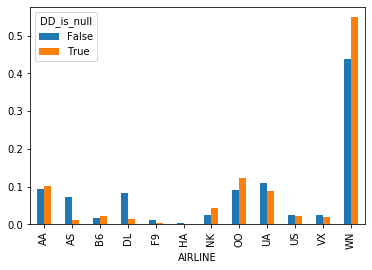

In [96]:
emp_distributions = (
    flight_xs
    .pivot_table(columns='DD_is_null', index='AIRLINE', values=None, aggfunc='size')
    .fillna(0)
    .apply(lambda x:x/x.sum())
)

emp_distributions.plot(kind='bar');

In [134]:
flights['CANCELLED'].value_counts()

False    138950
True       1464
Name: CANCELLED, dtype: int64

In [131]:
flights[['CANCELLED', 'CANCELLATION_REASON', 'TAIL_NUMBER', 'ARRIVAL_TIME']].\

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140414 entries, 0 to 140413
Data columns (total 4 columns):
CANCELLED              140414 non-null bool
CANCELLATION_REASON    1464 non-null object
TAIL_NUMBER            140205 non-null object
ARRIVAL_TIME           138864 non-null float64
dtypes: bool(1), float64(1), object(2)
memory usage: 3.3+ MB


In [107]:
proj.observed_tvd(flight_xs, 'AIRLINE')

0.17169085992911615

In [97]:
observed_tvd = np.sum(np.abs(emp_distributions.diff(axis=1).iloc[:,-1])) / 2
observed_tvd

0.17169085992911615

In [114]:
x = ['YEAR','DAY_OF_WEEK', 'AIRLINE','DIVERTED', 'CANCELLATION_REASON']

In [126]:
N = 1000
col = 'CANCELLATION_REASON'

flights_2 = flight_xs[[col, 'DD_is_null']]

tvds = []
for _ in range(N):
    
    # shuffle the airlines
    shuffled_airline = (
        flights_2[col]
        .sample(replace=False, frac=1)
        .reset_index(drop=True)
    )
    
    # put them in a table
    shuffled = (
        flights_2
        .assign(**{'Shuffled airline': shuffled_airline})
    )
    
    # compute the tvd
    shuffled_emp_distributions = (
        shuffled
        .pivot_table(columns='DD_is_null', index='Shuffled airline', values=None, aggfunc='size')
        .fillna(0)
        .apply(lambda x:x/x.sum())
    )
    
    tvd = np.sum(np.abs(shuffled_emp_distributions.diff(axis=1).iloc[:,-1])) / 2
    # add it to the list of results
    
    tvds.append(tvd)

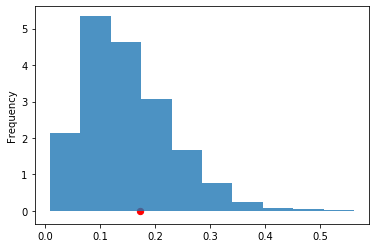

In [127]:
pd.Series(tvds).plot(kind='hist', density=True, alpha=0.8)
plt.scatter(observed_tvd, 0, color='red', s=40);

In [135]:
np.count_nonzero(tvds <= observed_tvd) / len(tvds)

0.659

In [111]:
x = ['YEAR','DAY_OF_WEEK', 'AIRLINE','DIVERTED', 'CANCELLATION_REASON']

In [112]:
[proj.perm4missing(flights, col, 1000) for col in x]

[1.0, 1.0, 1.0, 0.963, 0.121]

# Simpson's Paradox: JetBlue vs Southwest

The remainder of the questions investigates the presence of Simpson's paradox in the flights dataset. Read through the final slides of lecture 05, as well as [the book](https://afraenkel.github.io/practical-data-science/05/understanding-aggregations.html#simpsons-paradox) for a summary of Simpson's Paradox and related links.

The csv file `southwest_vs_jetblue.csv` contains all Southwest and JetBlue flights in 2015.

In this dataset, we are going to verify the following occurrences of Simpson's Paradox: For a given set of airports,
* The average departure delay of Southwest is greater than (or less than) the average departure delay of JetBlue.
* Airport by airport, the average departure delay of Southwest is *less* than (or greater than) the average departure delay of JetBlue.

That is, the inequalities of the average flight delays between the two airlines are reversed when viewed at the level of each airport. In fact this reversal holds for *every* airport being considered.

In [75]:
flights

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,DL,978,N693DL,SAN,SLC,615,611.0,-4.0,20.0,631.0,121,115.0,89.0,626.0,900.0,6.0,916,906.0,-10.0,False,False,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,OO,5608,N930SW,SAN,LAX,615,614.0,-1.0,16.0,630.0,52,48.0,25.0,109.0,655.0,7.0,707,702.0,-5.0,False,False,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,WN,823,N7707C,SAN,BWI,620,620.0,0.0,18.0,638.0,295,272.0,248.0,2295.0,1346.0,6.0,1415,1352.0,-23.0,False,False,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,WN,603,N461WN,SAN,MDW,620,617.0,-3.0,17.0,634.0,250,224.0,200.0,1728.0,1154.0,7.0,1230,1201.0,-29.0,False,False,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,UA,1192,N69804,SAN,DEN,620,618.0,-2.0,18.0,636.0,145,138.0,110.0,853.0,926.0,10.0,945,936.0,-9.0,False,False,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140409,2015,12,31,4,DL,1792,N1402A,SAN,ATL,2230,2223.0,-7.0,17.0,2240.0,234,228.0,199.0,1892.0,459.0,12.0,524,511.0,-13.0,False,False,NaN,NaN,NaN,NaN,NaN,NaN
140410,2015,12,31,4,UA,240,N30401,SAN,ORD,2235,2240.0,5.0,11.0,2251.0,248,205.0,188.0,1723.0,359.0,6.0,443,405.0,-38.0,False,False,NaN,NaN,NaN,NaN,NaN,NaN
140411,2015,12,31,4,DL,1366,N341NW,SAN,DTW,2245,2231.0,-14.0,15.0,2246.0,259,239.0,211.0,1956.0,517.0,13.0,604,530.0,-34.0,False,False,NaN,NaN,NaN,NaN,NaN,NaN
140412,2015,12,31,4,UA,498,N37267,SFO,SAN,2252,2250.0,-2.0,11.0,2301.0,89,76.0,62.0,447.0,3.0,3.0,21,6.0,-15.0,False,False,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
jb_sw_filepath = os.path.join('data', 'jetblue_or_sw.csv')
dtype = proj.data_types()

# The `usecols` keyword:
# choose *only* the columns you need to reduce your memory footprint!
usecols = ['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DEPARTURE_DELAY']

jb_sw = pd.read_csv(jb_sw_filepath, dtype=dtype, usecols=usecols)

**Question 8**

Filter the dataset `jb_sw` to flights *originating* from the following 10 airports: ABQ, BDL, BUR, DCA, MSY, PBI, PHX, RNO, SJC, SLC.

Illustrate Simpson's paradox with this table:
* Calculate the proportion of each airline's flights that are delayed (at each of the 10 airports):
    - Create a function `prop_delayed_by_airline` that takes in a dataframe like `jb_sw` and returns a DataFrame indexed by airline that contains the proportion of each airline's flights that are delayed.
* Calculate these proportions across all airports in the dataset (at each of the 10 airports):
    - Create a function `prop_delayed_by_airline_airport` that takes in a dataframe like `jb_sw` and returns a DataFrame, with columns given by airports, indexed by airline, that contains the proportion of each airline's flights that are delayed at each airport.

*Remark 1:* For the purpose of this question, a canceled flight is **not** considered delayed.

*Remark 2:* Make sure that the functions only work with the columns that are absolutely necessary for the question to avoid out of memory errors!

Verify that Simpson's paradox is present in this output! 

Can you explain *why* Simpson's paradox is occurring? (Hint: where are these airports located? Which have the most flights?)

In [146]:
airports = ['ABQ', 'BDL', 'BUR', 'DCA', 'MSY', 'PBI', 'PHX', 'RNO', 'SJC', 'SLC']

In [147]:
only_airports = jb_sw[jb_sw['ORIGIN_AIRPORT'].isin(airports)]
only_airports['DEPARTURE_DELAY'].size

178767

In [148]:
only_airports

,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY
25,WN,ABQ,HOU,7.0
26,WN,PHX,SLC,1.0
31,B6,PBI,JFK,-1.0
41,B6,MSY,JFK,-10.0
46,B6,DCA,BOS,-3.0
...,...,...,...,...
1528882,B6,SJC,JFK,24.0
1528892,B6,PHX,JFK,2.0
1528894,B6,RNO,JFK,0.0
1528895,B6,SLC,MCO,16.0


In [156]:
only_airports = only_airports.assign(Delayed = only_airports['DEPARTURE_DELAY'] > 0)

In [158]:
only_airports.groupby('AIRLINE')['Delayed'].mean().to_frame()

,Delayed
AIRLINE,
B6,0.386634
WN,0.447210


In [153]:
only_airports.groupby('AIRLINE')['DEPARTURE_DELAY'].apply(proportion_delayed).to_frame()

,DEPARTURE_DELAY
AIRLINE,
B6,0.386634
WN,0.447210


In [142]:
def proportion_delayed(series):
    delayed = (series > 0).sum()
    return delayed / series.size

In [143]:
only_airports.pivot_table(
    values = 'DEPARTURE_DELAY',
    index = 'AIRLINE', 
    columns = 'ORIGIN_AIRPORT',
    aggfunc = proportion_delayed)

ORIGIN_AIRPORT,ABQ,BDL,BUR,DCA,MSY,PBI,PHX,RNO,SJC,SLC
AIRLINE,,,,,,,,,,
B6,0.489051,0.371207,0.449102,0.285039,0.391111,0.476827,0.576169,0.544379,0.518887,0.485859
WN,0.457300,0.367560,0.342187,0.284563,0.377690,0.428684,0.549186,0.377978,0.464572,0.441616


In [144]:
jb_sw['DEPARTURE_DELAY']

0          -2.0
1         -14.0
2          -7.0
3          -3.0
4         -14.0
           ... 
1528898    -4.0
1528899    -4.0
1528900    -9.0
1528901    -6.0
1528902    15.0
Name: DEPARTURE_DELAY, Length: 1528903, dtype: float64

In [165]:
y = proj.prop_delayed_by_airline(jb_sw)

In [151]:
proj.prop_delayed_by_airline_airport(jb_sw)

ORIGIN_AIRPORT,ABQ,BDL,BUR,DCA,MSY,PBI,PHX,RNO,SJC,SLC
AIRLINE,,,,,,,,,,
B6,0.489051,0.371207,0.449102,0.285039,0.391111,0.476827,0.576169,0.544379,0.518887,0.485859
WN,0.457300,0.367560,0.342187,0.284563,0.377690,0.428684,0.549186,0.377978,0.464572,0.441616


AttributeError: 'builtin_function_or_method' object has no attribute 'tolist'

**Question 9**

Your work above illustrates Simpson's paradox on the specific dataset of flights originating from 10 specific airports. However, this still requires you to look at two dataframe to see if the paradox is present. Now, you will create a function that verifies Simpson's paradox in general. You will do this by writing code to compare the two dataframes, instead of inspecting them manually.

Create a function `verify_simpson` that returns a boolean output regarding if the paradox is present.
```
verify_simpson(df, group1, group2, occur)
```
- df is a dataframe (e.g. jb_sw),
- group1 is the first group being aggregated against (e.g. `AIRLINE`),
- group2 is the second group being aggregated against (e.g. `ORIGIN_AIRPORT`),
- occur is a column with values {0, 1}, denoting if an event occurred for that individual.
  (e.g. "1 if flight was delayed" and "0 if flight was not delayed")

`verify_simpson` should return `True` only if there is a reversal for *every* value of `group2` (e.g. for every airport).

Example:

Consider the following dataframe `df` with columns `treatment`, `stone_size`, and `success`:

|treatment|stone_size|success|
|---|---|---|
|A|small|1|
|B|small|1|
|...|...|...|
|A|large|0|
|B|small|0|
|B|small|1|

`df` corresponds to the following diagram:
<img src="https://miro.medium.com/max/996/1*IfVjfdGD7RPwLDC6WzT9Uw.png" style="width: 300px"/>

Here, `verify_simpson(df, 'treatment', 'stone_size', 'success')` should return `True`.

Verify that you function works on the previous question!

In [166]:
x 

ORIGIN_AIRPORT,ABQ,BDL,BUR,DCA,MSY,PBI,PHX,RNO,SJC,SLC
AIRLINE,,,,,,,,,,
B6,0.489051,0.371207,0.449102,0.285039,0.391111,0.476827,0.576169,0.544379,0.518887,0.485859
WN,0.457300,0.367560,0.342187,0.284563,0.377690,0.428684,0.549186,0.377978,0.464572,0.441616


In [167]:
y 

,DEPARTURE_DELAY
AIRLINE,
B6,0.386634
WN,0.447210


In [205]:
y.index.tolist()

['B6', 'WN']

In [181]:
z = x.loc['B6'] == y.loc['B6'][0]

In [201]:
for index in y.index:
    print(x.loc[index] == y.loc[index][0])

ORIGIN_AIRPORT
ABQ    False
BDL    False
BUR    False
DCA    False
MSY    False
PBI    False
PHX    False
RNO    False
SJC    False
SLC    False
Name: B6, dtype: bool
ORIGIN_AIRPORT
ABQ    False
BDL    False
BUR    False
DCA    False
MSY    False
PBI    False
PHX    False
RNO    False
SJC    False
SLC    False
Name: WN, dtype: bool


In [197]:
z = pd.Series([True, False, False, False])

In [237]:
z.all()

False

In [242]:
proj.verify_simpson(only_airports, 'AIRLINE', 'ORIGIN_AIRPORT', 'Delayed')

True

In [208]:
occur = 'Delayed'
df = only_airports.copy()
group1 = 'AIRLINE'
group2 = 'ORIGIN_AIRPORT'

In [222]:
total_proportion = df.groupby(group1)[occur].mean()

# get proportion of each item in group 2 
group_proportions = df.pivot_table(
    values = occur,
    index = group1, 
    columns = group2,
    aggfunc = 'mean'
    )

In [231]:
total_proportion.index

Index(['B6', 'WN'], dtype='object', name='AIRLINE')

pandas.core.series.Series

In [234]:
different = []
for idx in total_proportion.index.tolist():
    x = group_proportions.loc[idx] == total_proportion.loc[idx]
    different.append(x.any())


In [236]:
~pd.Series(different).any()

True

### Bonus problem (worth zero points)

This question is for fun and explores a very data-science type problem: can we automate finding examples of Simpson's Paradox? This is an active area of research (see for example: https://arxiv.org/pdf/1801.04385.pdf), but is a very accessible problem. While totally optional, this question can lead to pretty interesting self-driven projects!

**Question 10 (Searching for Simpson's Paradox):**

As you observed from the reading in the lecture notes, Simpson's Paradox often occurs due to some confounding factor among the columns of a dataset. In the case of gender balance in student admissions to academic departments at UC Berkeley, the confounding factor was the admission rate (i.e. how hard it is to gain admission to a department).

What might be a confounding factor be for flight delays among airports in question 8? Now you are going to write code to discover instances of Simpson's Paradox; that is, you will programmatically find interesting relationships present in the data.

Given the dataset `jb_sw`, we'd like to find new groups of airports, as in question 8, for which the statistics of flight delays between JetBlue and Southwest satisfy Simpson's Paradox.

Create a function `search_simpsons` that takes in the `jb_sw` dataset and a number `N`, and returns a list of `N` airports for which the proportion of flight delays between JetBlue and Southwest satisfies Simpson's Paradox.
- Only consider airports that have '3 letter codes',
- Only consider airports that have at least one JetBlue *and* Southwest flight.

*Remark 1:* Iterate through groups of airports of size `N` using `itertools.combinations` until you find a group that works. Make sure your function finishes, even if it doesn't find something.

*Remark 2:* You should be using your work from Question 9!

# Congratulations, you finished the project!

### Before you submit:
* Be sure you run the doctests on all your code in project02.py

### To submit:
* **Upload the .py file to gradescope**